In [ ]:
### 랜덤 포레스트(Random Forest)
# 집단 학습을 기반으로 고정밀 분류, 회귀, 클러스터링 등을 구현
# 학습 전용데이터를 기반으로 다수의 의사결정 트리를 만들고, 만들어진 의사결정 트리를 기반으로 
# 다수결로 결과를 유도함으로 높은 정밀도 자랑
# 학습 데이터를 무작위로 샘플링해서 만들어진 다수의 의사결정 트리를 사용하기 때문에 랜덤 포레스트
# "의사결정 트리"는 트리구조로 되어 있는 그래프로, 예측과 분류를 수행하는 알고리즘 자체를 말함

In [3]:
### 랜덤 포레스트 사용하기
# 소스 : https://archive.ics.uci.edu/ml/datasets/Mushroom

import urllib.request as req
local = "ML/Mushroom/mushroom.csv"
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data"
req.urlretrieve(url,local)
print('ok')

ok


In [4]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split

# 데이터 읽어 들이기
mr = pd.read_csv('ML/Mushroom/mushroom.csv',header=None)

# 데이터 내부의 기호를 숫자로 변환하기
label = []
data = []
attr_list = []
for row_index, row in mr.iterrows():
    label.append(row.iloc[0])
    row_data = []
    for v in row.iloc[1:]:
        row_data.append(ord(v))
    data.append(row_data)

# 학습 전용과 테스트 전용 데이터로 나누기
data_train, data_test, label_train, label_test = train_test_split(data, label)

# 데이터 학습시키기
clf = RandomForestClassifier()
clf.fit(data_train, label_train)

# 데이터 예측하기
predict = clf.predict(data_test)

# 결과 테스트하기
ac_score = metrics.accuracy_score(label_test,predict)
cl_report = metrics.classification_report(label_test,predict)
print('정답률 = ',ac_score)
print('리포트 = \n', cl_report)

정답률 =  1.0
리포트 = 
               precision    recall  f1-score   support

           e       1.00      1.00      1.00      1082
           p       1.00      1.00      1.00       949

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



In [6]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split

# 데이터 읽어 들이기
mr = pd.read_csv('ML/Mushroom/mushroom.csv',header=None)

# 데이터 내부의 분류 변수 전개하기
label = []
data = []
attr_list = []
for row_index, row in mr.iterrows():
    label.append(row.iloc[0])
    exdata = []
    for col, v in enumerate(row.iloc[1:]):
        if row_index == 0:
            attr = {'dic':{},'cnt':0}
            attr_list.append(attr)
        else:
            attr = attr_list[col]
        # 버섯의 특징 기호를 배열로 나타내기
        d = [0,0,0,0,0,0,0,0,0,0,0,0]
        if v in attr['dic']:
            idx = attr['dic'][v]
        else:
            idx = attr['cnt']
            attr['dic'][v] = idx
            attr['cnt'] += 1
        d[idx] = 1
        exdata += d
    data.append(exdata)

# 학습 전용과 테스트 전용 데이터로 나누기
data_train, data_test, label_train, label_test = train_test_split(data, label)

# 데이터 학습시키기
clf = RandomForestClassifier()
clf.fit(data_train, label_train)

# 데이터 예측하기
predict = clf.predict(data_test)

# 결과 테스트하기
ac_score = metrics.accuracy_score(label_test,predict)
cl_report = metrics.classification_report(label_test,predict)
print('정답률 = ',ac_score)
print('리포트 = \n', cl_report)

정답률 =  1.0
리포트 = 
               precision    recall  f1-score   support

           e       1.00      1.00      1.00      1049
           p       1.00      1.00      1.00       982

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



In [ ]:
### 데이터를 검증하는 방법
# 크로스 벨리데이션(Cross-validation) - 교차검증
# 특정 데이터를 훈련 전용 데이터와 테스트 전용 데이터로 분류한 다음에 훈련데이터를 사용하여 학습하고,
# 테스트 데이터로 학습의 타당성을 검증하는 방법
# 교차검증은 여러가지 방법이 있다. k분할 교차검증(k-fold cross validation)은 집합x를 3개로 분할
# A/B/C로 만드는 경우 생각한다.
# 1. 집합 x를 A/B/C 분할
# 2. A를 테스트 전용 데이터, 나머지 B/C는 훈련전용 데이터로 사용해 분류 정밀도 s1을 구한다.
# 3. B를 테스트 전용 데이터, 나머지 A/C는 훈련전용 데이터로 사용해 분류 정밀도 s2을 구한다.
# 4. C를 테스트 전용 데이터, 나머지 B/A는 훈련전용 데이터로 사용해 분류 정밀도 s3을 구한다.
# 5. 분류 정밀도 s1, s2, s3의 평균을 구해 최종적으로 분류 정밀도를 구한다.

In [7]:
from sklearn import svm, metrics
import random, re

# 붓꽃의 CSV파일 읽어 들이기
lines = open('ML/iris.csv','r',encoding='utf-8').read().split('\n')
f_tonum = lambda n : float(n) if re.match(r'^[0-9\.]+$',n) else n
f_cols = lambda li: list(map(f_tonum,li.strip().split(',')))
csv = list(map(f_cols,lines))
del csv[0] # 헤더 제거
random.shuffle(csv) # 데이터 섞기

# 데이터를 k개로 분할하기
k = 5
csvk = [[] for i in range(k)]
for i in range(len(csv)):
    csvk[i % k].append(csv[i])

# 리스트를 훈련 전용 데이터와 테스트 전용 데이터로 분할하는 함수
def split_data_label(rows):
    data=[]; label=[]
    for row in rows:
        data.append(row[0:4])
        label.append(row[4])
    return (data, label)

# 정답률 구하기
def calc_score(test,train):
    test_f, test_l = split_data_label(test)
    train_f, train_l = split_data_label(train)
    # 학습시키고 정답률 구하기
    clf = svm.SVC()
    clf.fit(train_f,train_l)
    pre = clf.predict(test_f)
    return metrics.accuracy_score(test_l,pre)

# k개로 분할해서 정답률 구하기
score_list = []
for testc in csvk:
    # testc 이외의 데이터를 훈련 전용 데이터로 사용하기
    trainc = []
    for i in csvk:
        if i != testc: trainc += i
    sc = calc_score(testc,trainc)
    score_list.append(sc)
print('각각의 정답률 = ', score_list)
print('평균 정답률 = ', sum(score_list) / len(score_list))

각각의 정답률 =  [0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 1.0, 0.9666666666666667]
평균 정답률 =  0.9733333333333333


In [9]:
# scikit-learn의 크로스 밸리데이션 사용해보기
from sklearn import svm, metrics, model_selection
import random, re

# 붓꽃의 CSV파일 읽어 들이기
csv = pd.read_csv('ML/iris.csv')

# 리스트를 훈련 전용 데이터와 테스트 전용 데이터로 분할하기
data = csv[['SepalLength','SepalWidth','PetalLength','PetalWidth']]
label = csv['Name']

# 크로스 밸리데이션하기
clf = svm.SVC()
scores = model_selection.cross_val_score(clf, data, label,cv=5)

print('각각의 정답률 = ', scores)
print('평균 정답률 = ', scores.mean())

각각의 정답률 =  [0.96666667 0.96666667 0.96666667 0.93333333 1.        ]
평균 정답률 =  0.9666666666666666


In [17]:
# 그리드 서치
import pandas as pd
from sklearn import model_selection, svm, metrics
from sklearn.model_selection import GridSearchCV

# MNIST 학습 데이터 읽어 들이기 - (※1)
train_csv = pd.read_csv("ML/mnist/train.csv")
test_csv = pd.read_csv("ML/mnist/t10k.csv")

# 필요한 열 추출하기 (※2)
train_label = train_csv.iloc[:,0]
train_data = train_csv.iloc[:,1:577]
test_label = test_csv.iloc[:, 0]
test_data = test_csv.iloc[:, 1:577]
print("학습 데이터의 수 =", len(train_label))

# 그리드 서치 매개변수 설정(※3)
params = [
{"C": [1,10,100,1000], "kernel":["linear"]},
{"C": [1,10,100,1000], "kernel":["rbf"], "gamma": [0.001, 0.0001]},
{"C": [1,10,100,1000], "kernel":["poly"], "gamma": [0.001, 0.0001]}
]

# 그리드 서치 수행 (※4)
clf = GridSearchCV(svm.SVC(), params, n_jobs=-1)
clf.fit(train_data, train_label)
print("학습기 =", clf.best_estimator_)

# 테스트 데이터 확인하기 – (※5)
pre = clf.predict(test_data)
ac_score = metrics.accuracy_score(test_label,pre)
print("정답률 =",ac_score)

학습 데이터의 수 = 1000
학습기 = SVC(C=1, gamma=0.001, kernel='poly')
정답률 = 0.866


C:\Users\user\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- 0.451
- 0.452
- 0.453
- 0.454
- 0.455
- ...
Feature names seen at fit time, yet now missing:
- 1
- 1.1
- 107
- 108
- 11
- ...

  warnings.warn(message, FutureWarning)


In [18]:
### 라이브러리 호출
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
import sklearn

from sklearn.datasets import load_boston
print('Numpy Version', np.__version__)
print('Pandas Version', pd.__version__)
print('Matplotlib Version', plt.__version__)
print('Seaborn Version', sns.__version__)
print('Sklearn Version', sklearn.__version__)

Numpy Version 1.22.3
Pandas Version 1.4.2
Matplotlib Version 3.5.2
Seaborn Version 0.11.2
Sklearn Version 1.1.1


In [19]:
boston = load_boston()
boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)
boston_df.head()

C:\Users\user\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [34]:
# CRIM: 지역별 범죄 발생률
# ZN: 25,000 평방 피트를 초과하는 거주 지역의 비율
# INDUS: 비상업 지역 토지의 비율
# CHAS: 찰스 강에 대한 더미 변수(강의 경계에 위치하면 1, 아니면 0)
# NOX: 일산화질소 농도
# RM: 주택 1가구당 평균 방의 개수
# AGE: 1940년 이전에 건축된 소유 주택의 비율
# DIS: 5개 보스턴 고용 센터까지의 접근성 지수
# RAD: 고속도로까지의 접근성 지수
# TAX: 10,000달러당 재산세율
# PTRATIO: 지역별 교사 한 명당 학생 비율
# B: 지역의 흑인 거주 비율
# LSTAT: 하위 계층 비율(%)
# MEDV: 타깃(Target), 자신 소유의 주택 가격(중앙값)(단위: $1,000)

boston_df['PRICE'] = boston.target
boston_df['PRICE']
print('boston_df 데이터 사이즈 : ', boston_df.shape)

## 훈련 및 테스트 데이터 분리
from sklearn.model_selection import train_test_split

y_target = boston_df['PRICE']
x_data = boston_df.drop(['PRICE'], axis=1, inplace=False)

x_train, x_test, y_train, y_test = train_test_split(x_data, y_target, test_size=0.3, random_state=0)

print('x_train 데이터 사이즈',x_train.shape)
print('x_test 데이터 사이즈',x_test.shape)
print('y_train 데이터 사이즈',y_train.shape)
print('y_test 데이터 사이즈',y_test.shape)

boston_df 데이터 사이즈 :  (506, 14)
x_train 데이터 사이즈 (354, 13)
x_test 데이터 사이즈 (152, 13)
y_train 데이터 사이즈 (354,)
y_test 데이터 사이즈 (152,)


In [35]:
# 머신러닝 알고리즘 모델 학습
from sklearn.linear_model import LinearRegression
from sklearn import tree

lr = LinearRegression()
lr.fit(x_train, y_train)

clf = tree.DecisionTreeRegressor()
clf.fit(x_train,y_train)

DecisionTreeRegressor()

In [36]:
# 평가
from sklearn.metrics import mean_squared_error, r2_score #

y_pred_lr = lr.predict(x_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test, y_pred_lr)

y_pred_clf = clf.predict(x_test)
mse_clf = mean_squared_error(y_test, y_pred_clf)
rmse_clf = np.sqrt(mse_clf)
r2_clf = r2_score(y_test, y_pred_clf)

print("- linear regression -")
print("lr MSE:", round(mse_lr, 3))
print("lr RMSE:", round(rmse_lr, 3))
print("- tree regression -")
print("Ir MSE:", round(mse_clf, 3))
print("lr RMSE:", round(rmse_clf, 3))

- linear regression -
lr MSE: 27.196
lr RMSE: 5.215
- tree regression -
Ir MSE: 27.919
lr RMSE: 5.284


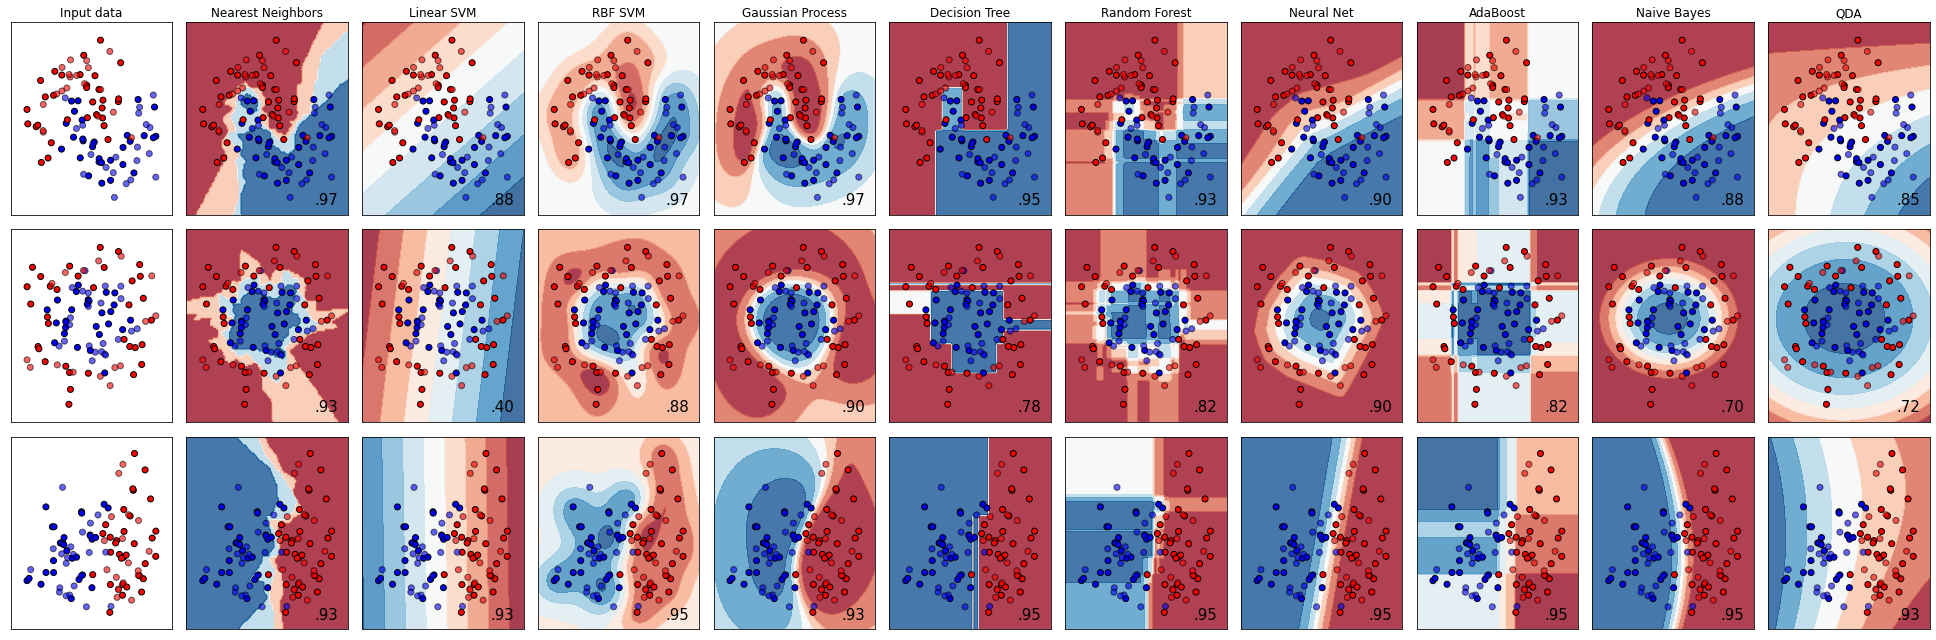

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.inspection import DecisionBoundaryDisplay

names = [
    "Nearest Neighbors",
    "Linear SVM",
    "RBF SVM",
    "Gaussian Process",
    "Decision Tree",
    "Random Forest",
    "Neural Net",
    "AdaBoost",
    "Naive Bayes",
    "QDA",
]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
]

X, y = make_classification(
    n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=1
)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [
    make_moons(noise=0.3, random_state=0),
    make_circles(noise=0.2, factor=0.5, random_state=1),
    linearly_separable,
]

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.4, random_state=42
    )

    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(["#FF0000", "#0000FF"])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k")
    # Plot the testing points
    ax.scatter(
        X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors="k"
    )
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)
        DecisionBoundaryDisplay.from_estimator(
            clf, X, cmap=cm, alpha=0.8, ax=ax, eps=0.5
        )

        # Plot the training points
        ax.scatter(
            X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k"
        )
        # Plot the testing points
        ax.scatter(
            X_test[:, 0],
            X_test[:, 1],
            c=y_test,
            cmap=cm_bright,
            edgecolors="k",
            alpha=0.6,
        )

        ax.set_xlim(x_min, x_max)
        ax.set_ylim(y_min, y_max)
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(
            x_max - 0.3,
            y_min + 0.3,
            ("%.2f" % score).lstrip("0"),
            size=15,
            horizontalalignment="right",
        )
        i += 1

plt.tight_layout()
plt.show()